## Telco Customer Churn

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### Import Necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (1).csv


In [7]:
df = pd.read_csv("/content/Telco-Customer-Churn.csv")

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Drop Unwanted Columns

In [9]:
df.drop(["customerID"], axis='columns' ,inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Inspect Data Types

In [10]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Data Types Fixing

In [11]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Dealing With Missing Values

In [13]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### EDA

### Gender Population Comparison

In [17]:
gender_df = df.groupby("gender").count()["Churn"]
gender_df

gender
Female    3483
Male      3549
Name: Churn, dtype: int64

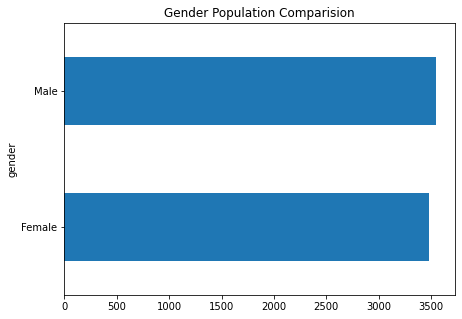

In [18]:
plt.figure(figsize=(7, 5))
gender_df.plot.barh()
plt.title("Gender Population Comparision")
plt.show()

### Churn Rate Comparison

In [19]:
churn_df = df.groupby("Churn").count()[["gender", "SeniorCitizen"]]
churn_df

,gender,SeniorCitizen
Churn,,
No,5163,5163
Yes,1869,1869


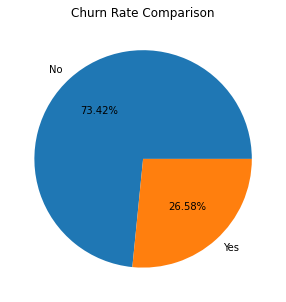

In [20]:
plt.figure(figsize=(7, 5))
plt.pie(x="gender", data=churn_df, autopct='%1.2f%%', labels=churn_df.index)
plt.title("Churn Rate Comparison")
plt.show()

### Payment Method

In [21]:
paymentmethod_df = df.groupby("PaymentMethod").count()[["gender", "Churn"]]
paymentmethod_df

,gender,Churn
PaymentMethod,,
Bank transfer (automatic),1542,1542
Credit card (automatic),1521,1521
Electronic check,2365,2365
Mailed check,1604,1604


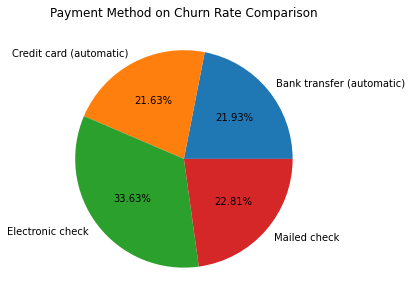

In [22]:
plt.figure(figsize=(7, 5))
plt.pie(x="Churn", data=paymentmethod_df, autopct='%1.2f%%', labels=paymentmethod_df.index)
plt.title("Payment Method on Churn Rate Comparison")
plt.show()

In [23]:
interest_feature_cols = ["TotalCharges", "MonthlyCharges"]

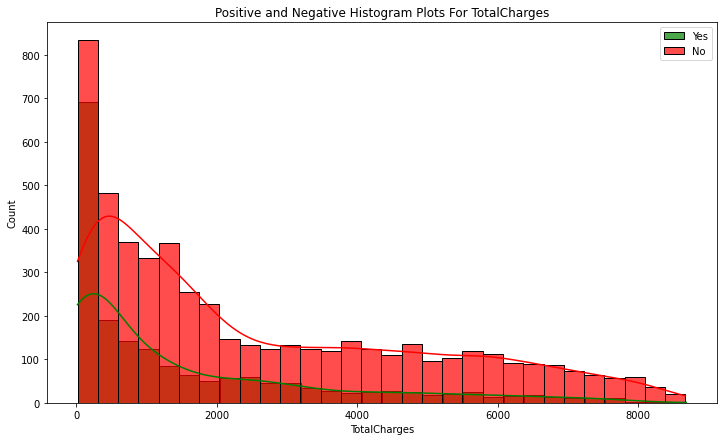

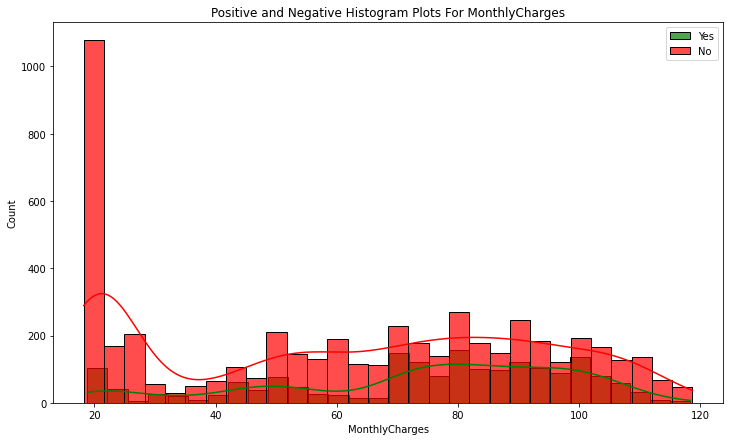

In [24]:
for feature_col in interest_feature_cols:
    pos_data = df[df["Churn"] == "Yes"][feature_col]
    neg_data = df[df["Churn"] == "No"][feature_col]
    
    plt.figure(figsize=(12, 7))

    sns.histplot(pos_data, bins=30, alpha=0.7,label="Yes", color="green", kde=True)
    sns.histplot(neg_data, bins=30, alpha=0.7, label="No", color="red", kde=True)
    
    plt.legend(loc="upper right")
    plt.title(f"Positive and Negative Histogram Plots For {feature_col}")
    plt.show()

### Categorical Encoding

In [25]:
for column in df:
    print(f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encoder = LabelEncoder()

In [28]:
for cat_col in df.select_dtypes("object").columns:
    
    if len(df[cat_col].unique()) == 2:
        df[cat_col] = label_encoder.fit_transform(df[cat_col])
            
    else:
        df = pd.get_dummies(data=df, columns=[cat_col])

In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


### Min-Max Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
min_max_scaler = MinMaxScaler()

In [32]:
df[["MonthlyCharges", "TotalCharges", "tenure"]] = min_max_scaler.fit_transform(df[["MonthlyCharges", "TotalCharges", "tenure"]])

In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,1,0.115423,0.001275,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,0.385075,0.215867,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,1,0.354229,0.010310,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,0.239303,0.210241,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,1,0.521891,0.015330,1,...,1,0,0,1,0,0,0,0,1,0


In [34]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMetho

### Split Data Into Train And Test Splits

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df.drop(["Churn"], axis="columns")
y = df["Churn"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=90)

In [38]:
X_train.shape

(5625, 40)

In [39]:
y_train.shape

(5625,)

### Build Model

In [40]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import os

In [41]:
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

In [42]:
model = Sequential([
    Dense(units=40, input_shape=(40, ), activation="relu"),
    Dense(units=15, activation="relu"),
    Dense(units=1, activation="sigmoid")
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [43]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80)

Epoch 1/80
176/176 [==============================] - 1s 2ms/step - loss: 0.4780 - accuracy: 0.7691 - val_loss: 0.4083 - val_accuracy: 0.8038
Epoch 2/80
176/176 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.7975 - val_loss: 0.4045 - val_accuracy: 0.7967
Epoch 3/80
176/176 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.7963 - val_loss: 0.4029 - val_accuracy: 0.8067
Epoch 4/80
176/176 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.7982 - val_loss: 0.4010 - val_accuracy: 0.8060
Epoch 5/80
176/176 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.8009 - val_loss: 0.3987 - val_accuracy: 0.8067
Epoch 6/80
176/176 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8028 - val_loss: 0.4042 - val_accuracy: 0.8095
Epoch 7/80
176/176 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8059 - val_loss: 0.3978 - val_accuracy: 0.8131
Epoch 

### Make Predictions

In [44]:
y_predictions = model.predict(X_test)

44/44 [==============================] - 0s 780us/step


In [45]:
y_predictions[0]

array([0.00556084], dtype=float32)

In [46]:
y_predictions = [1 if prediction >= 0.5 else 0 for prediction in y_predictions]

In [47]:
y_predictions[0]

0

### Model Evaluations

In [48]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 836us/step - loss: 0.4422 - accuracy: 0.7804


[0.44215720891952515, 0.7803837656974792]

In [49]:
from sklearn.metrics import classification_report, confusion_matrix


In [50]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1049
           1       0.57      0.54      0.56       358

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



In [51]:
cm = confusion_matrix(y_test, y_predictions)

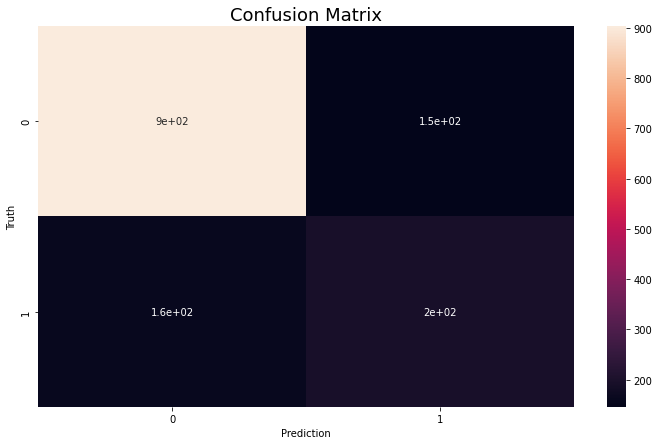

In [52]:
plt.figure(figsize=(12, 7))
plt.title("Confusion Matrix", fontsize=18)
sns.heatmap(cm, annot=True)
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()